In [1]:
import os
import sys
source_path = os.path.abspath(os.path.join("..", "source"))
if source_path not in sys.path:
    sys.path.append(source_path)

In [2]:
from get_alibi import get_alibi

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
nb_heads = 8
nb_patches_height = 3
nb_patches_width = 4
alibi, distances, slope = get_alibi(
    nb_heads=nb_heads,
    nb_patches_height=nb_patches_height,
    nb_patches_width=nb_patches_width)

## Plot entire distance matrix
*Shape: (nb_patches_height × nb_patches_width +1, nb_patches_height × nb_patches_width +1)*

In [5]:
nb_patches = nb_patches_height*nb_patches_width
ticks = [patch_index for patch_index in range(nb_patches +1)]
labels = ["cls"]
for i in range(nb_patches):
    labels.append(str(i))

y_ticks = [patch_index for patch_index in range(nb_patches_height +1)]
y_labels = ["cls"]
for i in range(nb_patches_height):
    y_labels.append(str(i))    

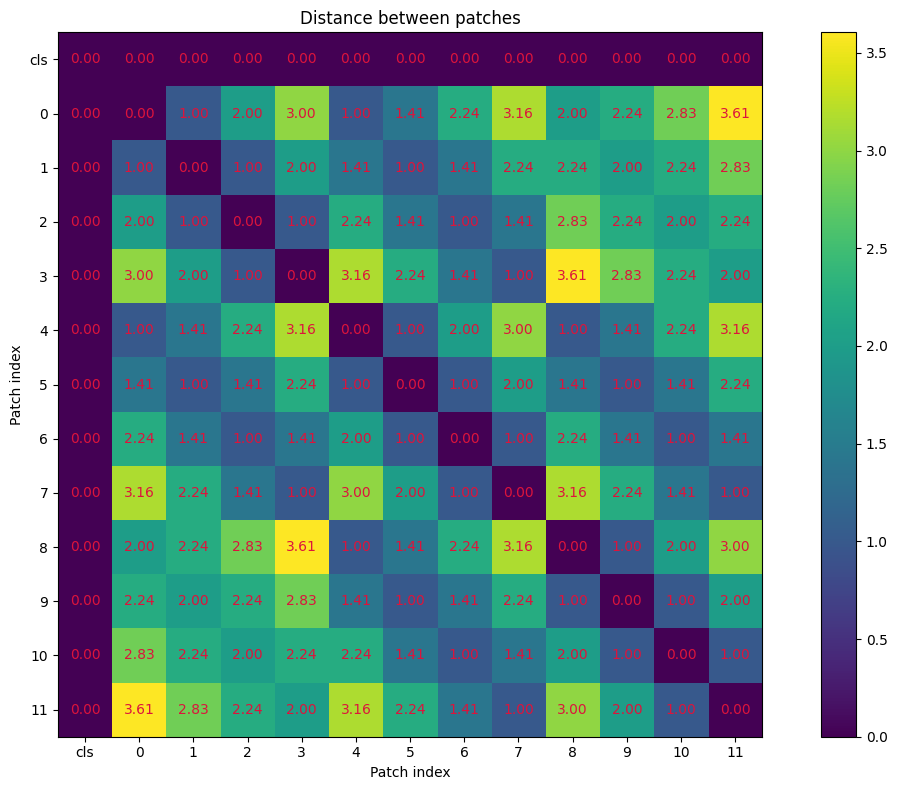

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.imshow(distances, cmap="viridis")
plt.ylabel("Patch index")
plt.xlabel("Patch index")
ax.set_xticks(ticks)
ax.set_xticklabels(labels=labels)
ax.set_yticks(ticks)
ax.set_yticklabels(labels=labels)
plt.title("Distance between patches")

for i in range(nb_patches +1):
    for j in range(nb_patches +1):
        d = "{0:.2f}".format(np.asarray(distances[i, j]))
        ax.text(j, i, d, color='crimson', ha='center', va='center')

plt.colorbar()
plt.tight_layout()
plt.show()

## Plot all distance metrics, from a given patch to all other patches
*Shape: (nb_patches_height, nb_patches_width)*

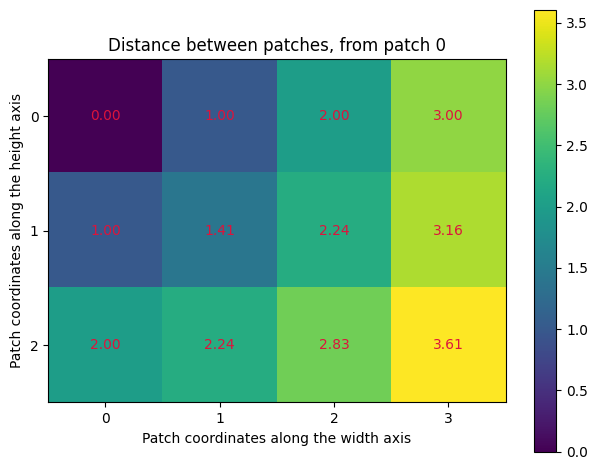

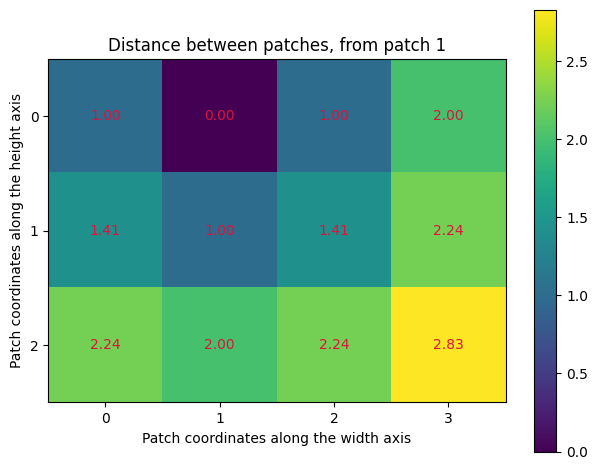

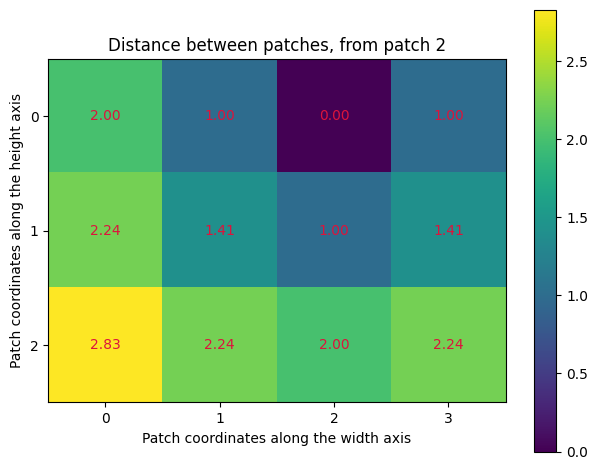

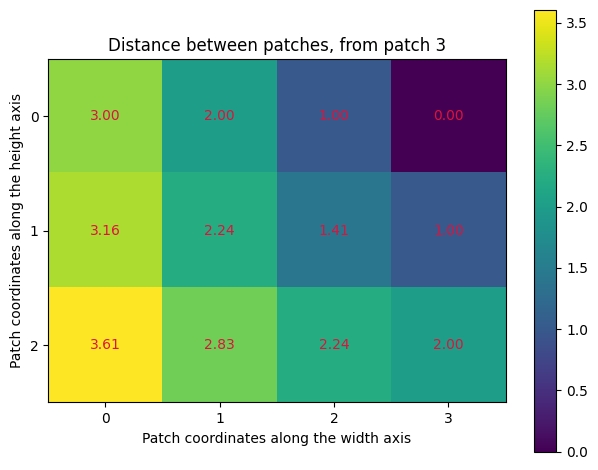

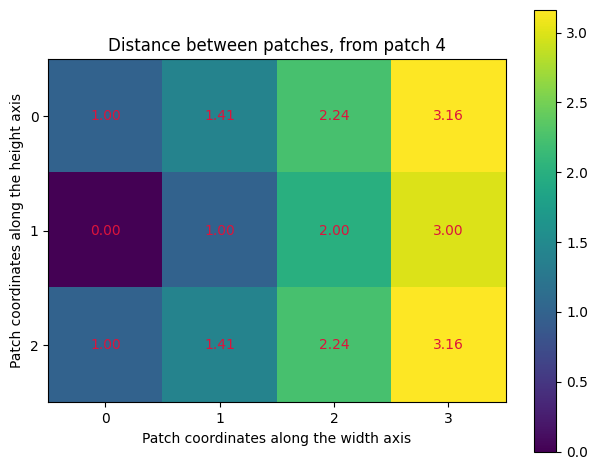

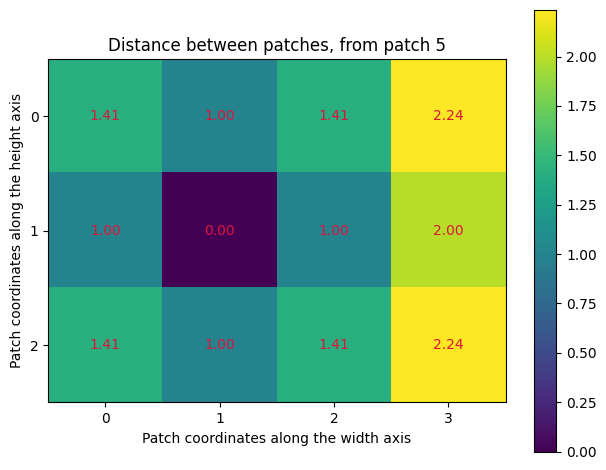

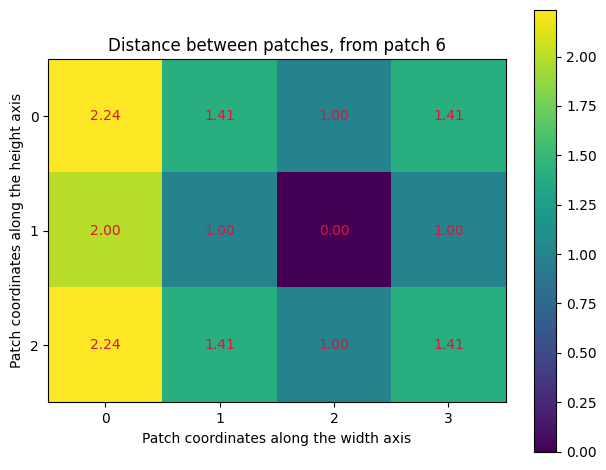

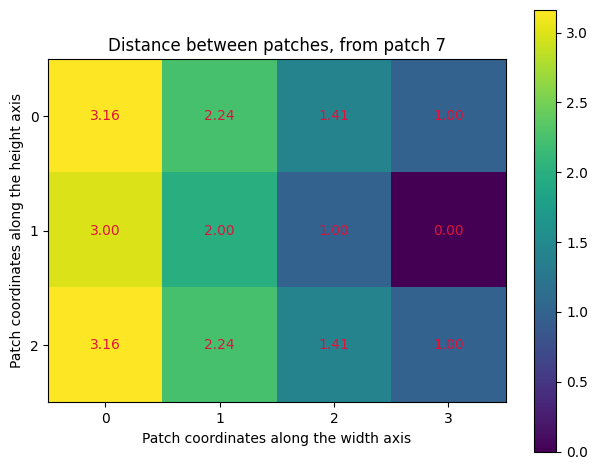

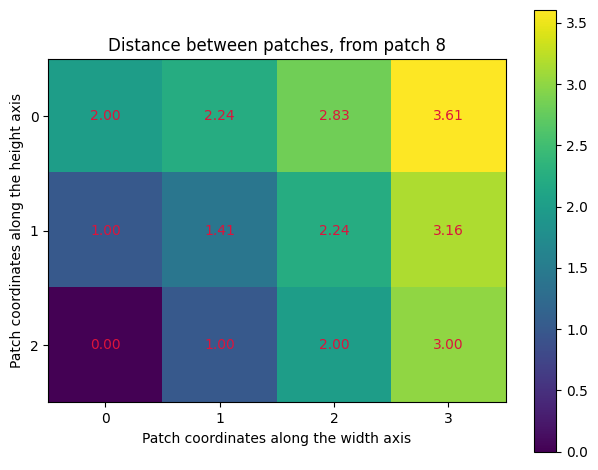

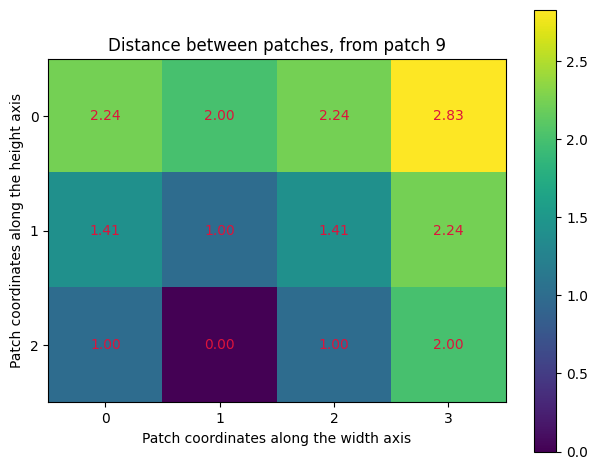

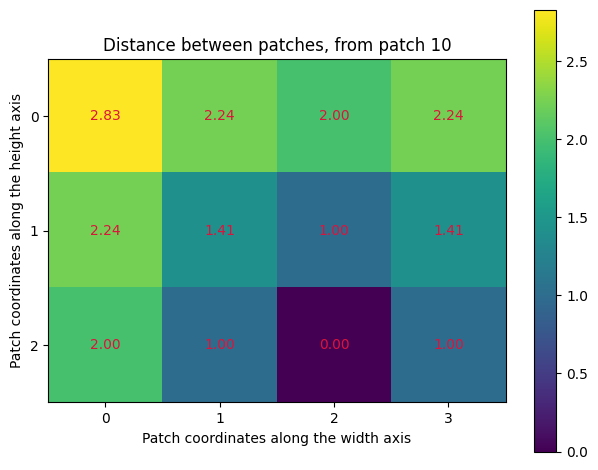

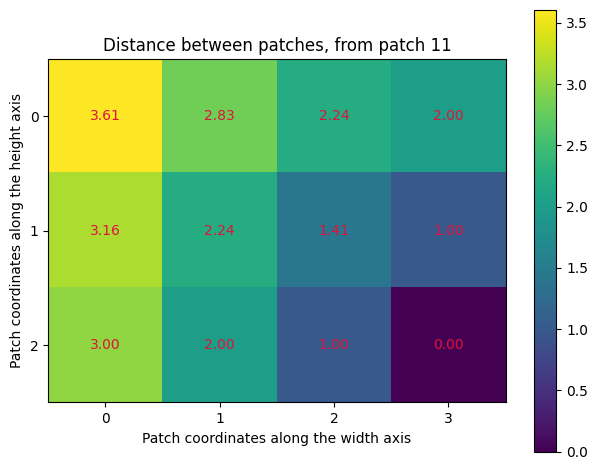

In [7]:
for patch_index in range(nb_patches_height * nb_patches_width):

    distance = distances[patch_index +1, 1:]
    distance = distance.view(nb_patches_height, nb_patches_width)
    x_ticks = [i for i in range(nb_patches_width)]
    y_ticks = [i for i in range(nb_patches_height)]
    
    fig, ax = plt.subplots()
    plt.imshow(distance, cmap="viridis")
    plt.ylabel("Patch coordinates along the height axis")
    plt.xlabel("Patch coordinates along the width axis")
    plt.title("Distance between patches, from patch {}".format(patch_index))
    ax.set_xticks(x_ticks)  
    ax.set_yticks(y_ticks)  
    
    for y in range(nb_patches_height):
        for x in range(nb_patches_width):
            d = "{0:.2f}".format(np.asarray(distance[y, x]))
            ax.text(x, y, d, color='crimson', ha='center', va='center')
    
    plt.colorbar()
    plt.tight_layout()
    plt.show()


## Plot linear biases
Shape: (nb_patches_per_side^2 +1, nb_patches_per_side^2 +1)

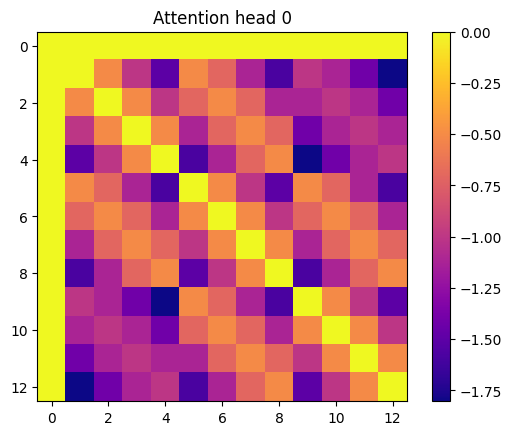

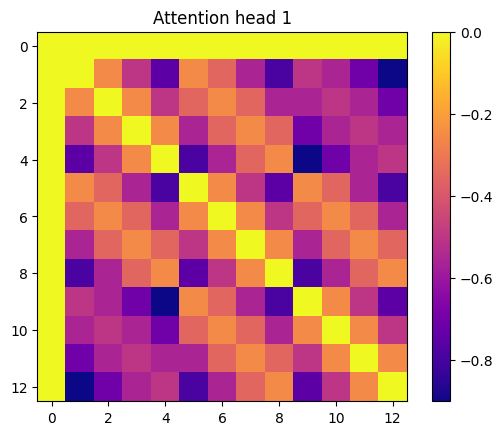

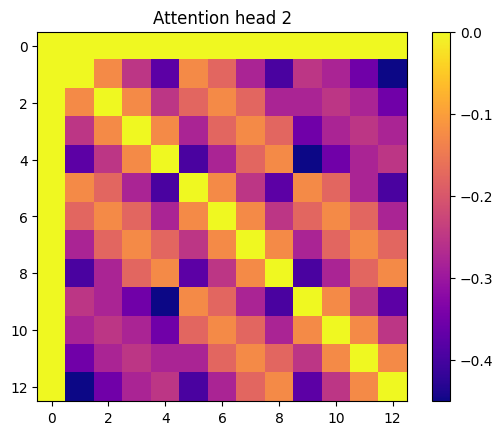

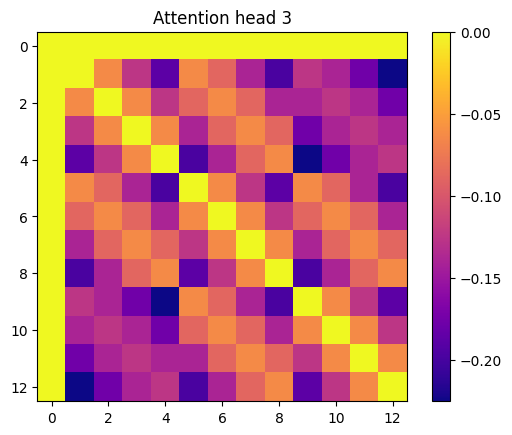

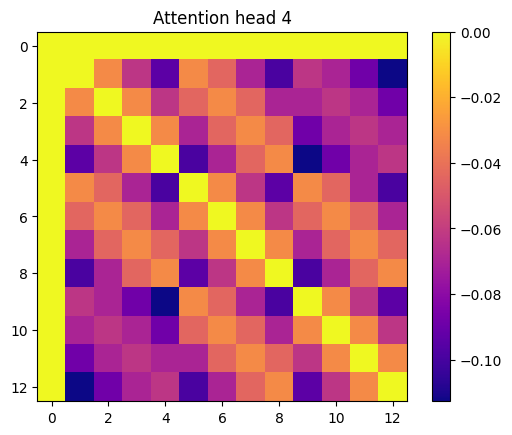

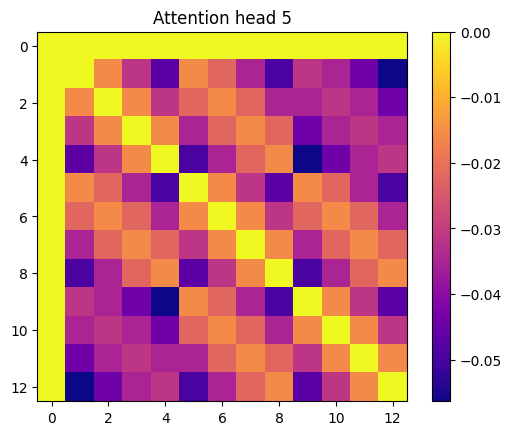

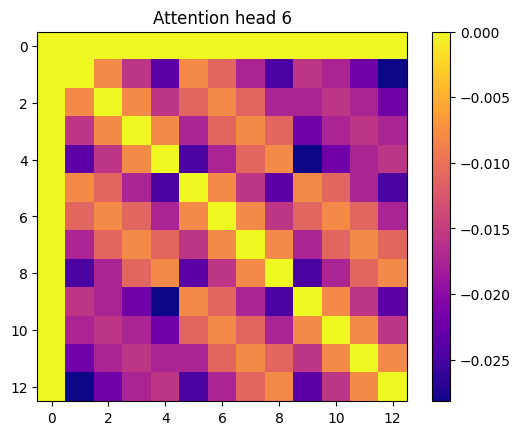

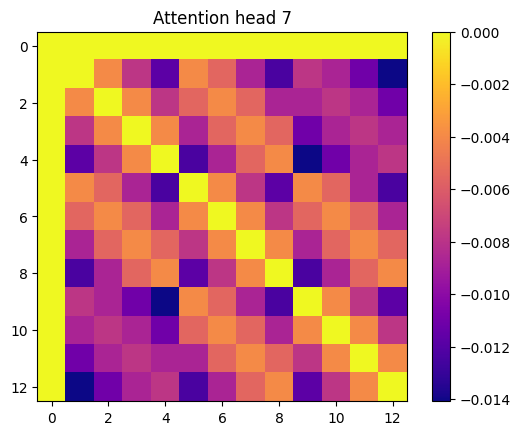

In [8]:
for head_index in range(nb_heads):
  plt.figure()
  plt.imshow(alibi[0, head_index, :, :], cmap="plasma")
  plt.title("Attention head {}".format(head_index))
  plt.colorbar()
plt.show()

## Plot slope
*Shape: (nb_heads)*

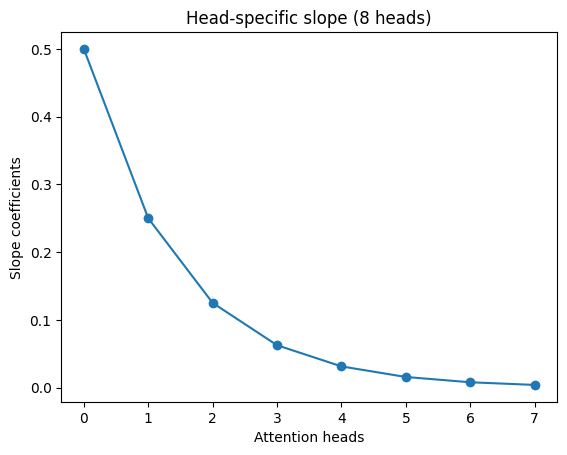

In [9]:
plt.figure()
plt.plot(slope, "-o")
plt.ylabel("Slope coefficients")
plt.xlabel("Attention heads")
plt.title("Head-specific slope ({} heads)".format(nb_heads))
plt.show()